# Logistic Regression: Batch GD, Stochastic GD, Mini-batch GD 비교 (make_moons 데이터셋)

이번 실습에서는 **make_moons 데이터셋**을 사용하여 Logistic Regression을 학습합니다.
그리고 Gradient Descent 방식 (Batch, Stochastic, Mini-batch)에 따른 차이를 비교합니다.


In [1]:
# matplotlib 폰트 깨짐 현상 해결
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

# 사용 가능한 한글 폰트 찾기
font_list = [f.name for f in fm.fontManager.ttflist]
korean_fonts = [f for f in font_list if any(keyword in f.lower() for keyword in ['apple', 'nanum', 'malgun', 'gothic', 'dotum'])]

# 가장 적합한 한글 폰트 선택
if 'Apple SD Gothic Neo' in korean_fonts:
    selected_font = 'Apple SD Gothic Neo'
elif 'Nanum Myeongjo' in korean_fonts:
    selected_font = 'Nanum Myeongjo'
elif 'AppleGothic' in korean_fonts:
    selected_font = 'AppleGothic'
elif 'Malgun Gothic' in korean_fonts:
    selected_font = 'Malgun Gothic'
else:
    selected_font = korean_fonts[0] if korean_fonts else 'DejaVu Sans'

# 폰트 설정 적용
plt.rcParams.update({
    'font.family': selected_font,
    'font.size': 10,
    'axes.unicode_minus': False,
    'figure.autolayout': True,
    'axes.grid': True,
    'grid.alpha': 0.3
})

print(f"선택된 폰트: {selected_font}")
print("한글 폰트 설정 완료!")

선택된 폰트: Apple SD Gothic Neo
한글 폰트 설정 완료!


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. 데이터 생성 및 전처리

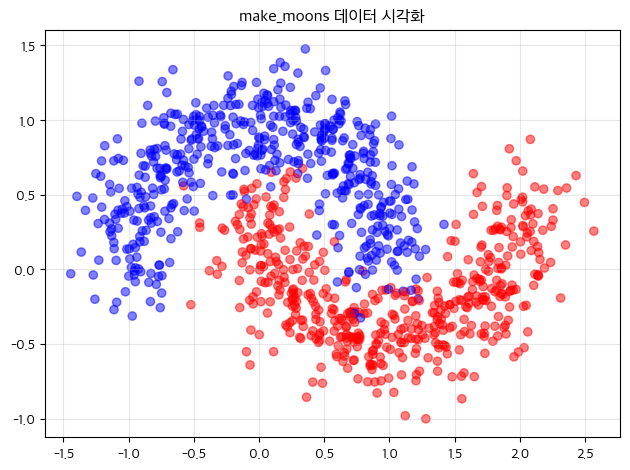

In [3]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", alpha=0.5)
plt.title("make_moons 데이터 시각화")
plt.show()

## 2. 학습 함수 정의

In [4]:
def train_logistic(X, y, epochs=50, lr=0.1, batch_size=None):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X.shape[1],)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    history = model.fit(X, y,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0,
                        validation_split=0.2)
    return history, model

## 3. Batch GD 학습 (전체 데이터 사용)

In [6]:
history_batch, model_batch = train_logistic(
    X_train, y_train, epochs=100, lr=0.1, batch_size=len(X_train)
)

2025-10-29 20:30:47.799433: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


## 4. Stochastic GD 학습 (batch_size=1)

In [7]:
history_sgd, model_sgd = train_logistic(
    X_train, y_train, epochs=100, lr=0.1, batch_size=1
)

## 5. Mini-batch GD 학습 (batch_size=32)

In [8]:
history_mini, model_mini = train_logistic(
    X_train, y_train, epochs=100, lr=0.1, batch_size=32
)

## 6. Loss 비교 시각화

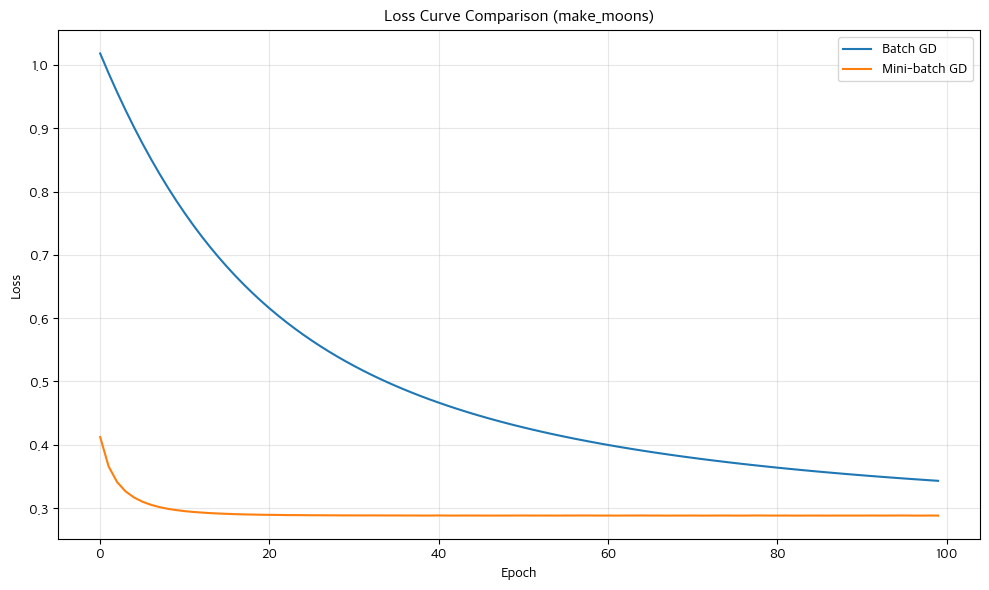

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history_batch.history["loss"], label="Batch GD")
plt.plot(history_sgd.history["loss"], label="Stochastic GD")
plt.plot(history_mini.history["loss"], label="Mini-batch GD")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve Comparison (make_moons)")
plt.show()

## 7. 최종 정확도 비교

In [11]:
print("Batch GD 정확도:", model_batch.evaluate(X_test, y_test, verbose=0)[1])
print("Stochastic GD 정확도:", model_sgd.evaluate(X_test, y_test, verbose=0)[1])
print("Mini-batch GD 정확도:", model_mini.evaluate(X_test, y_test, verbose=0)[1])

Batch GD 정확도: 0.8500000238418579
Stochastic GD 정확도: 0.8450000286102295
Mini-batch GD 정확도: 0.8500000238418579


## 생각해보기
- 각 GD 방식의 장단점은 무엇일까요?

Batch GD는 빠르게 학습하지만 정확한 값을 찾지 못하고, Stochastic GD는 느리지만 정확도를 잘 찾아가고, Mini-batch GD는 